# Get Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('./spambase.data',delimiter=',')
X = data[:, :-1]
y = data[:, -1]

In [3]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0


In [4]:
pd.DataFrame(y).head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


# Clean, Prepare & Manipulate Data & Train Data & Test Data

In [5]:
def evaluate_model(name, clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    acc_train = clf.score(X_train, y_train)
    acc_test = clf.score(X_test, y_test)
    print("{0:>15}: train= {1:.3f}, test = {2:.3f}".format( name, acc_train, acc_test))

In [6]:
names = [ "Bernoulli NB", "Gaussian NB", "Multinomial NB"]
classifiers = [ BernoulliNB(), GaussianNB(), MultinomialNB() ]

In [8]:
for name, clf in zip(names, classifiers):
    # preprocess dataset, split into training and test part
    if name is names[0]:
        XX = np.where(X>0,1.0,0)
    elif name is names[1]:
        scaler = StandardScaler().fit(X)
        XX = scaler.transform(X)
    else:
        XX =X.copy()
    
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=.3)
    evaluate_model( name, clf, X_train, y_train, X_test, y_test)

   Bernoulli NB: train= 0.883, test = 0.890
    Gaussian NB: train= 0.822, test = 0.823
 Multinomial NB: train= 0.795, test = 0.796


# Improve

In [9]:
scores_train=[]
scores_test=[]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for threshold in thresholds:
    XX = np.where(X>threshold,1.0,0)
    improve_clf = BernoulliNB()
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=.3)
    improve_clf.fit(X_train, y_train)
    acc_train = improve_clf.score(X_train, y_train)
    scores_train.append(acc_train)
    acc_test = improve_clf.score(X_test, y_test)
    scores_test.append(acc_test)

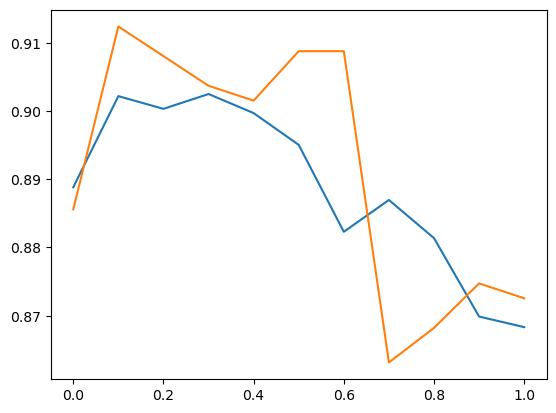

In [10]:
plt.plot(thresholds, scores_train, label='train')
plt.plot(thresholds, scores_test, label='test')
plt.show()

In [11]:
for threshold in [0.2,0.3]:
    XX = np.where(X>threshold,1.0,0)
    improve_clf = BernoulliNB()
    X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=.3)
    improve_clf.fit(X_train, y_train)
    acc_train = improve_clf.score(X_train, y_train)
    scores_train.append(acc_train)
    acc_test = improve_clf.score(X_test, y_test)
    scores_test.append(acc_test)
    print("{0:>15}: train= {1:.3f}, test = {2:.3f}".format( name, acc_train, acc_test))

 Multinomial NB: train= 0.907, test = 0.892
 Multinomial NB: train= 0.903, test = 0.894
